<a href="https://colab.research.google.com/github/nour-said/face-emotion-recognation/blob/main/face_emotion_recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [6]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [7]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [49]:
img = cv2.imread('/content/train/angry/Training_10422050.jpg')

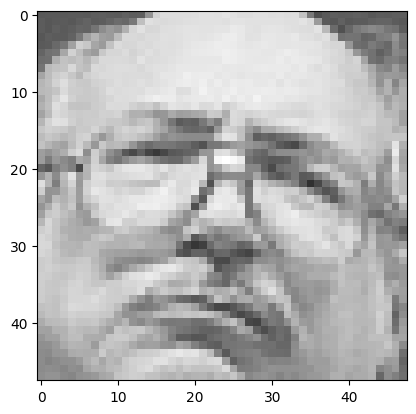

In [50]:
plt.imshow(img)

In [51]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in face:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

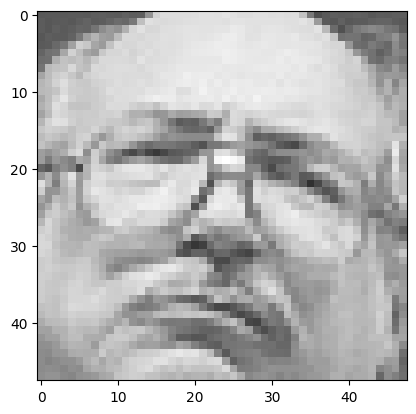

In [52]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [53]:
p = DeepFace.analyze(img)
p

Action: race: 100%|██████████| 4/4 [00:00<00:00, 47.76it/s]


[{'emotion': {'angry': np.float32(32.95007),
   'disgust': np.float32(0.00091000064),
   'fear': np.float32(26.680779),
   'happy': np.float32(0.00018725882),
   'sad': np.float32(38.416958),
   'surprise': np.float32(2.0493944e-05),
   'neutral': np.float32(1.9510856)},
  'dominant_emotion': 'sad',
  'region': {'x': 0,
   'y': 0,
   'w': 47,
   'h': 47,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.89,
  'age': 39,
  'gender': {'Woman': np.float32(0.13900094), 'Man': np.float32(99.861)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(12.784384),
   'indian': np.float32(4.9703403),
   'black': np.float32(0.9529859),
   'white': np.float32(32.17528),
   'middle eastern': np.float32(36.325176),
   'latino hispanic': np.float32(12.791836)},
  'dominant_race': 'middle eastern'}]

In [54]:
font = cv2.FONT_HERSHEY_SIMPLEX
#cv2.putText(img, p[0]['dominant_emotion'], (0,50), font, 1, (0,0,255), 2, cv2.LINE_4)
img = cv2.putText(img, p[0]['dominant_emotion'], (0, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)

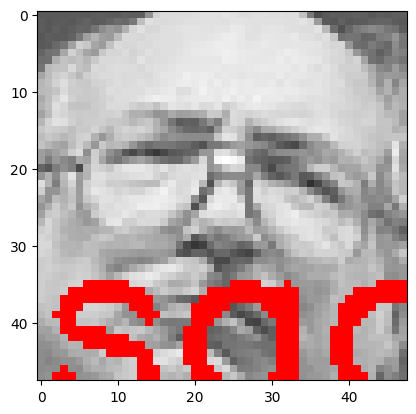

In [55]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [57]:
img_size = 48
train_dir = '/content/train'
test_dir = '/content/test'

In [58]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [59]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [68]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(512,activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [69]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_69 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 24, 24, 128)     

In [70]:
history = model.fit(x=train_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25
359/359 [==============================] - 32s 62ms/step - loss: 5.5648 - accuracy: 0.2314 - val_loss: 2.8431 - val_accuracy: 0.2270
Epoch 2/25
359/359 [==============================] - 21s 58ms/step - loss: 2.3586 - accuracy: 0.3104 - val_loss: 2.2618 - val_accuracy: 0.3624
Epoch 3/25
359/359 [==============================] - 20s 56ms/step - loss: 2.2327 - accuracy: 0.3959 - val_loss: 2.5314 - val_accuracy: 0.4071
Epoch 4/25
359/359 [==============================] - 21s 58ms/step - loss: 2.3195 - accuracy: 0.4430 - val_loss: 2.4429 - val_accuracy: 0.3966
Epoch 5/25
359/359 [==============================] - 22s 60ms/step - loss: 2.2185 - accuracy: 0.4793 - val_loss: 2.2963 - val_accuracy: 0.5251
Epoch 6/25
359/359 [==============================] - 20s 56ms/step - loss: 2.1988 - accuracy: 0.4896 - val_loss: 2.2424 - val_accuracy: 0.5112
Epoch 7/25
359/359 [==============================] - 21s 59ms/step - loss: 2.1731 - accuracy: 0.5023 - val_loss: 2.1206 - val_accuracy:

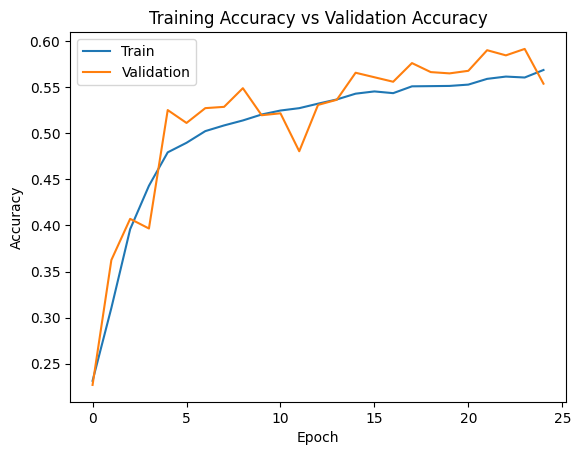

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

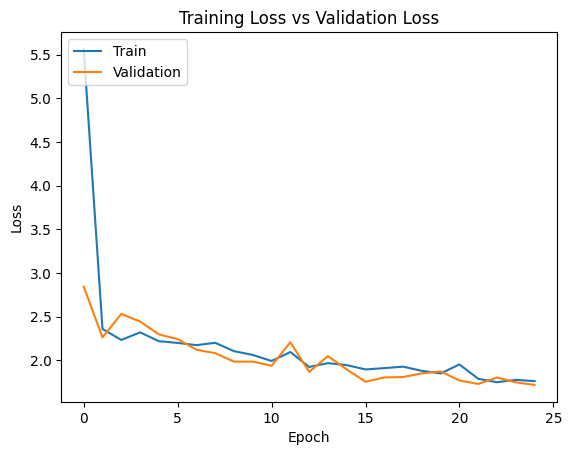

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [75]:
model.save('model_optimal.h5')


In [91]:
label_dict = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}


(48, 48, 3)
1/1 [==============================] - 0s 17ms/step
[np.float32(2.6571381e-14), np.float32(2.9013397e-33), np.float32(1.0), np.float32(1.7290858e-10), np.float32(1.3262181e-34), np.float32(0.0), np.float32(2.927736e-09)]


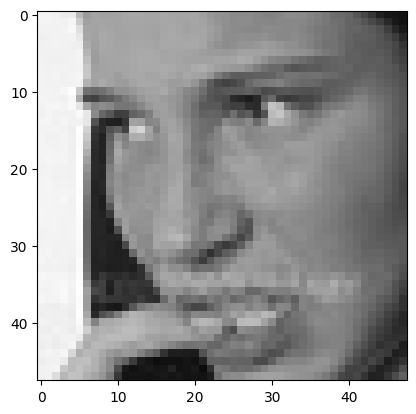

In [98]:
import numpy as np
img = cv2.imread('/content/train/fear/Training_10018621.jpg')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)


In [99]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear
